# Import

In [1]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

import cv2
import matplotlib.pyplot as plt

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/107.7 GB disk)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Predict with crop hand

In [ ]:
# Hip Param
file_path_images = '/content/drive/MyDrive/Hackaton/YOLO/data/test/images/94186988.jpg'
model_path = '/content/drive/MyDrive/Hackaton/YOLO/runs/detect/train2/weights/best.pt'
file_path_dir = '/content/drive/MyDrive/Hackaton/YOLO/data/test/images/'

In [ ]:
model = YOLO(model_path)
results = model.predict(file_path_images, save=False, imgsz=1600, conf=0.25) # Переводим в режим предсказания объекта и записываем результаты
# Циклом проходим по списку результатов
for r in results:
  # Забираем координаты обнаруженного объекта
  boxes = r.boxes.xyxy
  # Преобразуем к нампи массиву
  numpy_array = boxes.cpu().numpy()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


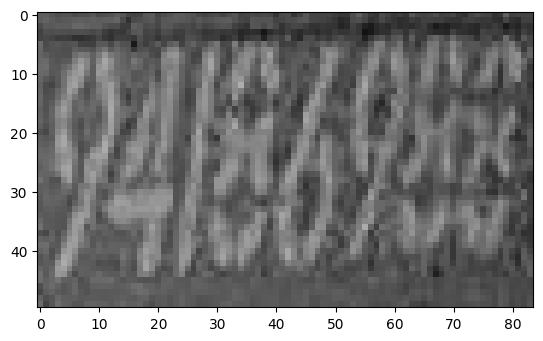

In [ ]:
img = cv2.imread(file_path_images)
crop_img = img[int(numpy_array[0][1]):int(numpy_array[0][3]), int(numpy_array[0][0]):int(numpy_array[0][2])]
crop_img = cv2.imwrite('crop_img.jpeg', crop_img)
plt.imshow(crop_img)
plt.show()

# RUN

In [4]:
import os

In [5]:
file_path_dir = '/content/drive/MyDrive/Hackaton/YOLO/data/test/images/'
model_path = '/content/drive/MyDrive/Hackaton/YOLO/runs/detect/train2/weights/last.pt'
images = os.listdir(file_path_dir)

In [6]:
!mkdir predict_crop

In [ ]:
images = os.listdir(file_path_dir)
for image in images:
  model = YOLO(model_path)
  results = model.predict(file_path_dir + image, save=False, imgsz=1600, conf=0.25) # Переводим в режим предсказания объекта и записываем результаты
  # Циклом проходим по списку результатов
  for r in results:
    # Забираем координаты обнаруженного объекта
    boxes = r.boxes.xyxy
    # Преобразуем к нампи массиву
    numpy_array = boxes.cpu().numpy()
    img = cv2.imread(file_path_dir + image)
    crop_img = img[int(numpy_array[0][1]):int(numpy_array[0][3]), int(numpy_array[0][0]):int(numpy_array[0][2])]
    %cd '/content/predict_crop/'
    crop_img = cv2.imwrite('crop_img_' + image, crop_img)


In [ ]:
file_path_dir = '/content/predict_crop/'
images = os.listdir(file_path_dir)
path_dest = '/content/predict_crop/'
for image in images:
    fname = file_path_dir + image
    bgray = cv2.imread(fname)[...,0]
    blured1 = cv2.medianBlur(bgray,3)
    blured2 = cv2.medianBlur(bgray,51)
    divided = np.ma.divide(blured1, blured2).data
    normed = np.uint8(255*divided/divided.max())
    th, threshed = cv2.threshold(normed, 100, 255, cv2.THRESH_OTSU)
    img_tesseract = threshed
    cv2_imshow(threshed)
    %cd '/content/high quality/'
    cv2.imwrite( image + ".png", threshed)

# Image editing

In [ ]:
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

    return resized_image


def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)


def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)


image_path = '/content/crop_img.jpeg'
img = cv2.imread(image_path)

resized = enlarge_img(img, 300)
gray_image = grayscale(resized)
thresh, im_bw = cv2.threshold(gray_image, 100, 300, cv2.THRESH_OTSU)
no_noise = noise_removal(im_bw)
eroded_image = thick_font(no_noise)
dilated_image = thick_font(no_noise)
cv2.imwrite("dilated_image.jpg", dilated_image)

True


# easyocr

In [ ]:
!pip install easyocr

In [ ]:
import easyocr

In [ ]:
def text_recognition(file_path):
    reader = easyocr.Reader([])
    result = reader.readtext(file_path)

    return result

print(text_recognition(file_path='/content/dilated_image.jpg'))

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[0, 0], [252, 0], [252, 149], [0, 149]], '9464/5', 0.07660697721422727)]
